<a href="https://colab.research.google.com/github/caiquemiranda/patterns/blob/main/aula_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4019    0  4019    0     0  16076      0 --:--:-- --:--:-- --:--:-- 16076
100  503k  100  503k    0     0   797k      0 --:--:-- --:--:-- --:--:--  797k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4027    0  4027    0     0  17818      0 --:--:-- --:--:-- --:--:-- 17818
100  406k  100  406k    0     0   661k      0 --:--:-- --:--:-- --:--:--  661k


In [5]:
import talib
import numpy
c = numpy.random.randn(100)
c

array([ 1.45833002, -0.2182458 ,  1.12176162, -0.09474947,  2.48233603,
       -0.63199869, -0.72273313,  1.02072883,  0.15441357,  0.09581278,
       -0.55002811,  0.67914908, -1.3288569 , -0.37472553, -1.510057  ,
       -1.14917215,  0.20754921,  0.28739542,  1.92936651, -0.6796358 ,
       -0.36955787, -0.99660139, -0.61559667,  3.04442175,  1.66341607,
       -0.35956959, -0.50477624, -0.86675544, -0.23337744, -0.95919852,
        1.32128319, -0.21979925,  0.88800902, -0.30312757,  1.15782432,
       -0.65227172,  1.35913214,  0.18721886, -0.38116713,  2.88052295,
        0.94167863, -0.6319883 ,  0.37023292,  0.7121261 ,  1.99362959,
        0.35920635,  1.66171677,  0.65865531,  0.42927868,  1.41750758,
        0.22223589, -0.17341345,  0.76070899, -0.23988419,  0.10717187,
        0.77723883, -0.81441763,  0.72786028, -1.62820207, -0.03998435,
        0.84744178,  0.3875533 , -0.20945429, -1.68040703,  0.03279828,
        0.40781869,  0.84552913, -1.69757911,  1.0113322 , -1.68

In [6]:
k, d = talib.STOCHRSI(c)

In [7]:
rsi = talib.RSI(c)
k, d = talib.STOCHF(rsi, rsi, rsi)

In [8]:
rsi = talib.RSI(c)
k, d = talib.STOCH(rsi, rsi, rsi)

# Aula sobre Pytorch - IFTM

In [ ]:
x = 4
print(x)

In [ ]:
import torch

In [ ]:
x = torch.rand(5,5)
print(x)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid() 
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
print(iris)

In [ ]:
dados = iris.data
classes = iris.target
nomes_classes = iris.target_names
print(dados)
print(classes)

In [ ]:
from sklearn.utils import shuffle
x = dados[0:100, :] #
y = classes[0:100]
print(x)
print(y)
x, y = shuffle(x, y)
print(x)
print(y)


In [ ]:
print(type(x))
print(type(y))

In [ ]:
training_input = torch.FloatTensor(x[0:80, :]) / 10
training_output = torch.FloatTensor(y[0:80])
test_input = torch.FloatTensor(x[80:100, :]) / 10
test_output = torch.FloatTensor(y[80:100])
print(test_output.size())
print(test_input.size())

In [ ]:
#Definindo o modelo
input_size = training_input.size()[1]
hidden_size = 5
model = Net(input_size, hidden_size)
#print(model)
for param in model.parameters():
  #print(param)
  pass

In [ ]:
#Preparando o treinamento
criterion = torch.nn.MSELoss() #Mean Square Error Loss (saida_real - saida_prevista)^2
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#Avaliar o erro inicial da rede
model.eval() # roda a rede mas sem atualizar os pesos
y_pred = model(test_input)
before_train = criterion(y_pred.squeeze(), test_output)
#[100,] --> [100]
print(f'Erro antes do treinamento: {before_train.item()}')

In [ ]:
#Treinamento da rede
model.train()
epochs = 10000
errors = []
for epoch in range(epochs):
  optimizer.zero_grad()
  #fazer o forward da minha rede
  y_pred = model(training_input)
  #calcula o erro desse treinamento
  loss = criterion(y_pred.squeeze(), training_output)
  errors.append(loss.item())
  if epoch % 100 == 0:
    print(f'Epoch: {epoch}. Train loss: {loss.item()}')
  #backpropagation
  loss.backward()
  optimizer.step()

In [ ]:
#Avaliar o erro pós treinamento da rede
model.eval() # roda a rede mas sem atualizar os pesos
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print(f'Erro pós-treinamento: {after_train.item()}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

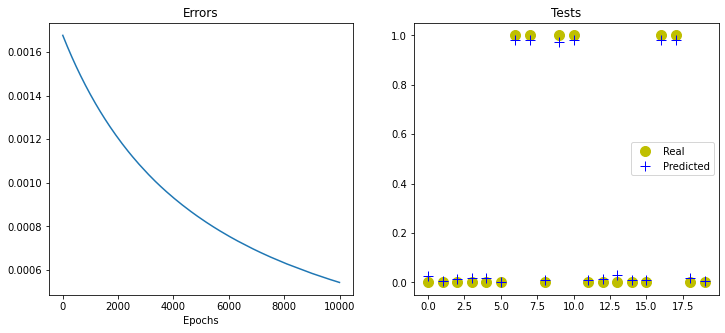

In [ ]:
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [ ]:
#Lista de atividades
#1) Treinar a rede para classicar as três classes da Iris.
#2) Ou usar a função de ativação TanH (-1 até o 1) setosa (-1), virginica (0), versicolor(1)
#3) Separar 80% dos valores para treinamento e 20% dos valores para fazer os testes.
